Train set shape: (614, 8)
Test set shape: (154, 8)
Train set shape: (614, 8)
Test set shape: (154, 8)
Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\gokul\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:57:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154

Accuracy: 0.7272727272727273
Precision: 0.6428571428571429
Recall: 0.5
F1-score: 0.5625
ROC-AUC: 0.8149074074074074


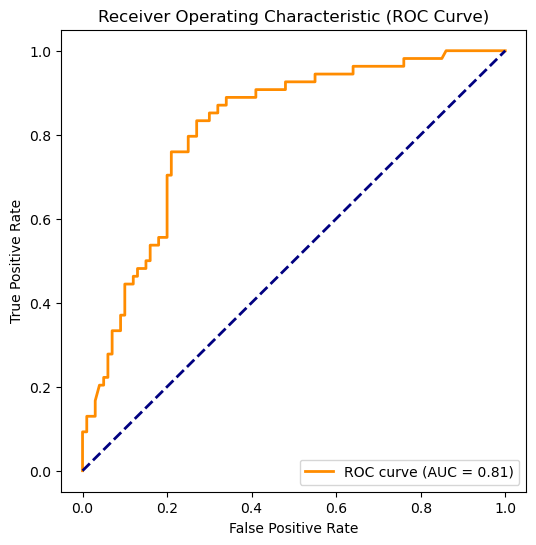

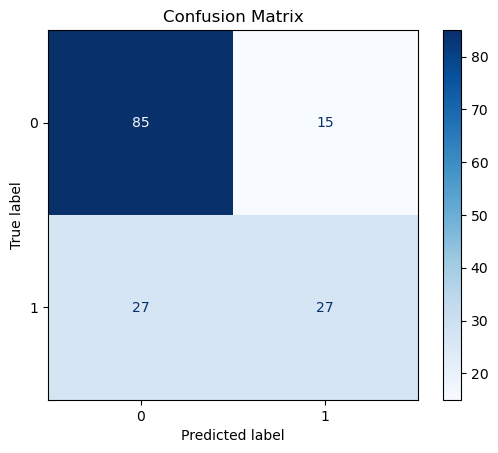

In [13]:
%run dataprocessing.ipynb
%run XGBoost.ipynb

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [16]:
print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())

Before SMOTE: {0: 400, 1: 214}
After SMOTE: {0: 400, 1: 400}


In [17]:
xgb_clf_balanced = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    **grid_search.best_params_   
)

In [18]:
xgb_clf_balanced.fit(X_train_res, y_train_res)

c:\Users\gokul\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:57:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [19]:
y_pred_bal = xgb_clf_balanced.predict(X_test)
y_proba_bal = xgb_clf_balanced.predict_proba(X_test)[:,1]

In [20]:
print("\nClassification Report with SMOTE:\n", classification_report(y_test, y_pred_bal))
print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print("Precision:", precision_score(y_test, y_pred_bal))
print("Recall:", recall_score(y_test, y_pred_bal))
print("F1-score:", f1_score(y_test, y_pred_bal))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_bal))


Classification Report with SMOTE:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78       100
           1       0.60      0.80      0.68        54

    accuracy                           0.74       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.77      0.74      0.75       154

Accuracy: 0.7402597402597403
Precision: 0.5972222222222222
Recall: 0.7962962962962963
F1-score: 0.6825396825396826
ROC-AUC: 0.8229629629629629


In [21]:
import pickle
with open("diabetes_model.pkl", "wb") as f:
    pickle.dump(xgb_clf_balanced, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)